In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('walmart_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### **Basic Analysis**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
df.shape

(550068, 10)

Data has 550068 rows and 10 columns

In [7]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [8]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [9]:
df['Gender'].value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

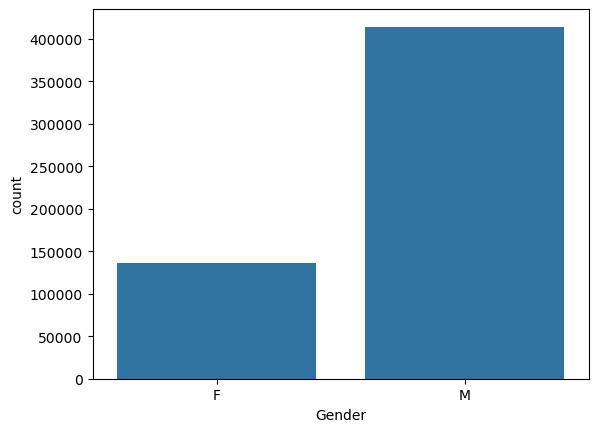

In [10]:
sns.countplot(data=df, x=df['Gender'])
plt.show()

In [11]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
df['Age'].value_counts()

Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64

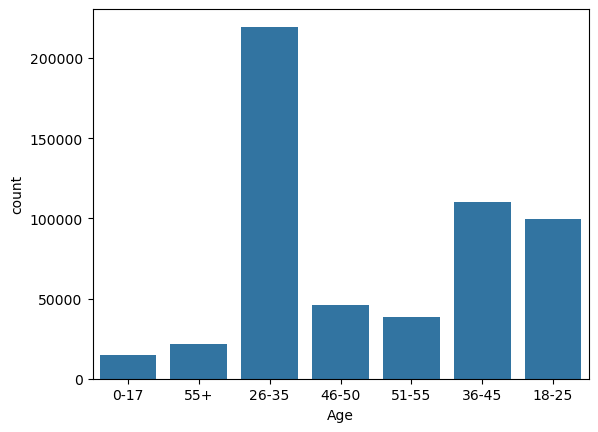

In [13]:
sns.countplot(data=df, x=df['Age'])
plt.show()

In [14]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

<Axes: xlabel='Occupation', ylabel='Count'>

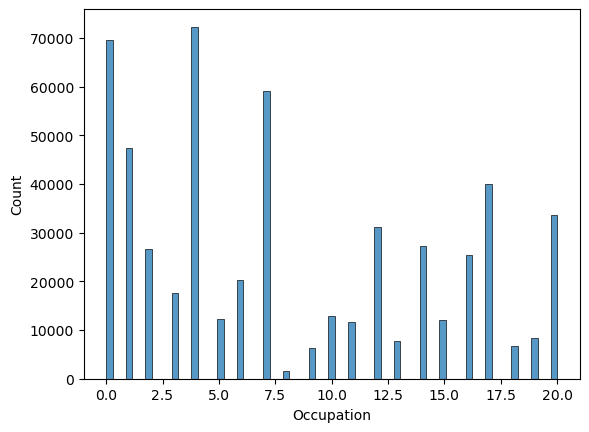

In [15]:
sns.histplot(data=df['Occupation'])

In [16]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [17]:
df['City_Category'].value_counts()

City_Category
B    231173
C    171175
A    147720
Name: count, dtype: int64

<Axes: xlabel='City_Category', ylabel='count'>

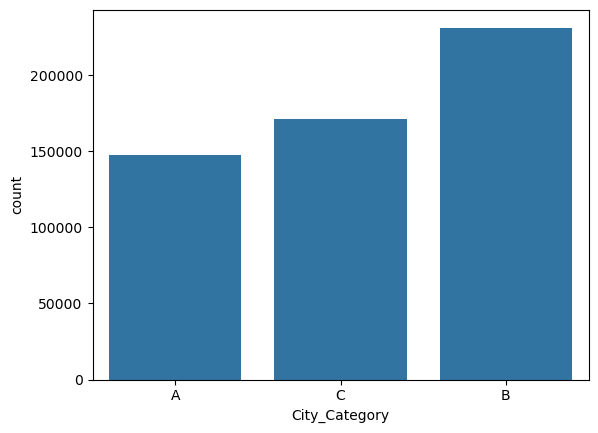

In [18]:
sns.countplot(data=df, x=df['City_Category'])

In [19]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='Count'>

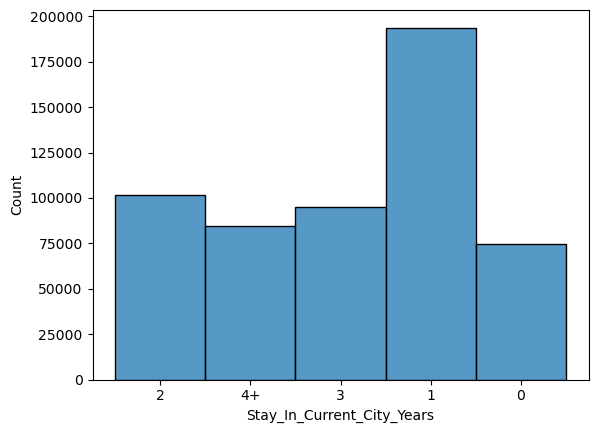

In [20]:
sns.histplot(data=df, x=df['Stay_In_Current_City_Years'])

In [21]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

In [22]:
df['Marital_Status'].value_counts()

Marital_Status
0    324731
1    225337
Name: count, dtype: int64

<Axes: xlabel='Marital_Status', ylabel='count'>

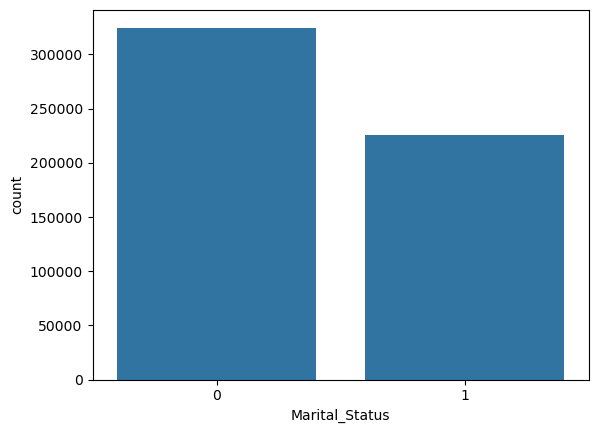

In [23]:
sns.countplot(data=df, x=df['Marital_Status'])

In [24]:
df['Product_Category'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

<Axes: xlabel='Product_Category', ylabel='count'>

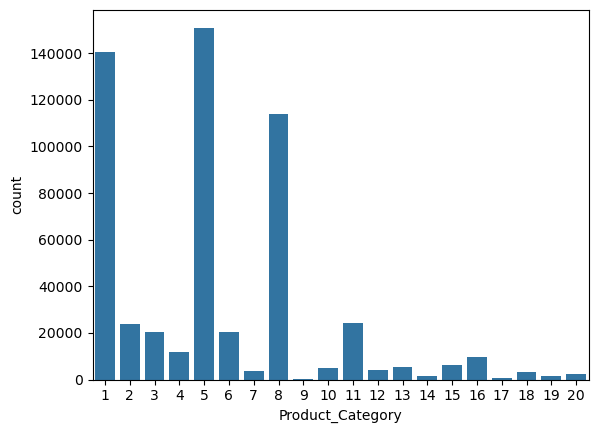

In [25]:
sns.countplot(data=df, x=df['Product_Category'])

In [26]:
df['Product_ID'].nunique()

3631

In [27]:
df['Purchase'].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

<Axes: ylabel='Purchase'>

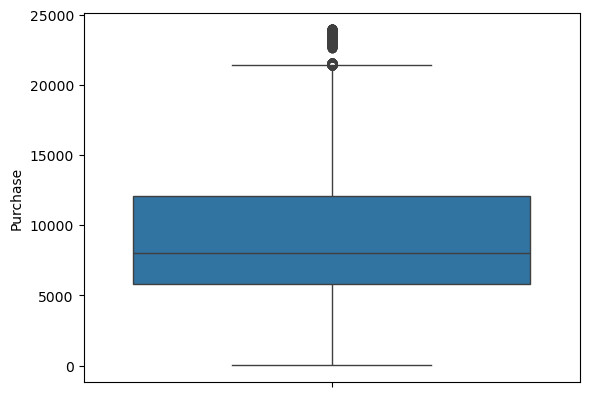

In [28]:
sns.boxplot(data=df['Purchase'])

In [29]:
np.mean(df['Purchase'])

9263.968712959126

### Check null values and outliers

In [30]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Data has zero missing values in all the columns

In [31]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [32]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### Data Exploration

In [33]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


<Axes: xlabel='Age', ylabel='Product_Category'>

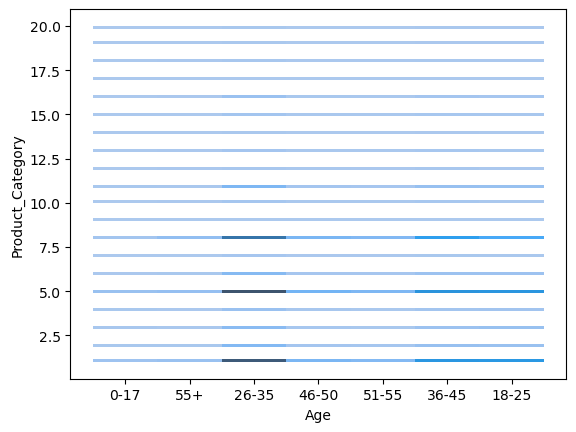

In [34]:
sns.histplot(x = 'Age', y = 'Product_Category', data=df)

<Axes: xlabel='Age', ylabel='Purchase'>

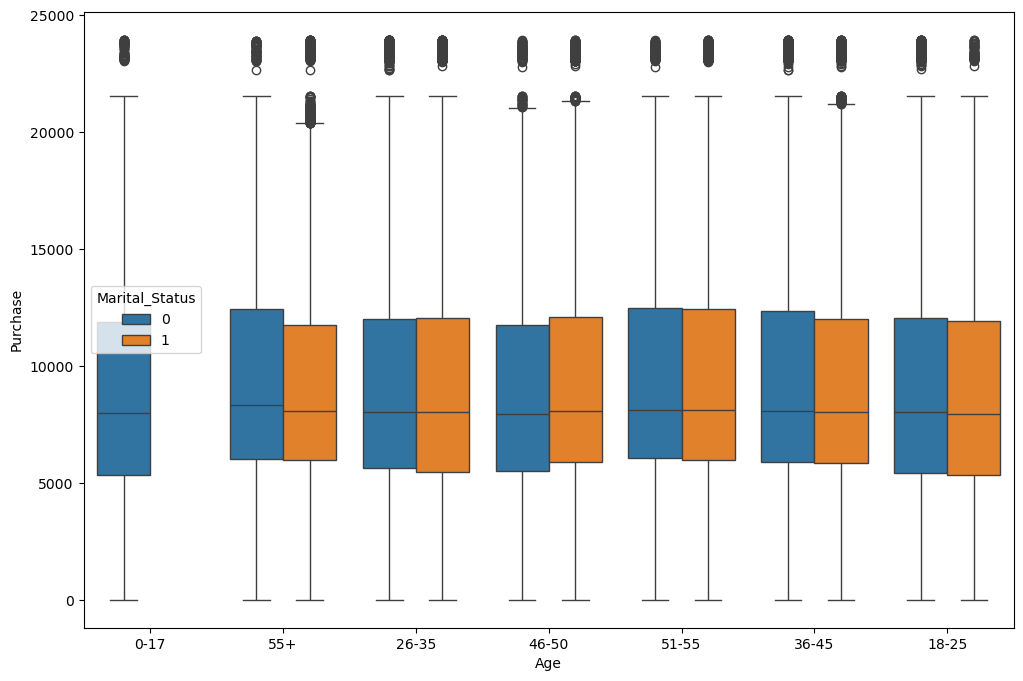

In [35]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Age',y='Purchase',hue='Marital_Status',data=df)

<Axes: xlabel='Gender'>

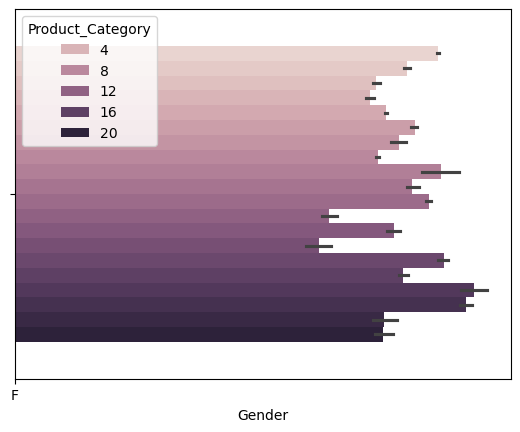

In [36]:
sns.barplot(x='Gender', hue='Product_Category', data=df)

In [37]:
pd.crosstab(index=df['Gender'], columns=df['Product_Category'], margins=True)

Product_Category,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,All
Gender,,,,,,,,,,,,,,,,,,,,,
F,24831,5658,6006,3639,41961,4559,943,33558,70,1162,...,1532,1462,623,1046,2402,62,382,451,723,135809
M,115547,18206,14207,8114,108972,15907,2778,80367,340,3963,...,2415,4087,900,5244,7426,516,2743,1152,1827,414259
All,140378,23864,20213,11753,150933,20466,3721,113925,410,5125,...,3947,5549,1523,6290,9828,578,3125,1603,2550,550068


In [38]:
pd.crosstab(index=df['Gender'], columns=df['Product_Category'], margins=True, normalize="index") * 100

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Gender,,,,,,,,,,,,,,,,,,,,
F,18.283766,4.166145,4.422387,2.679498,30.897069,3.356920,0.694358,24.709703,0.051543,0.855613,3.489459,1.128055,1.076512,0.458732,0.770199,1.768660,0.045652,0.281277,0.332084,0.532365
M,27.892454,4.394835,3.429497,1.958678,26.305282,3.839868,0.670595,19.400182,0.082074,0.956648,4.718787,0.582969,0.986581,0.217255,1.265875,1.792598,0.124560,0.662146,0.278087,0.441028
All,25.520118,4.338373,3.674637,2.136645,27.438971,3.720631,0.676462,20.711076,0.074536,0.931703,4.415272,0.717548,1.008784,0.276875,1.143495,1.786688,0.105078,0.568112,0.291419,0.463579
